In [1]:
# !pip install missingno
# !pip install pycomb

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pycomb
import seaborn as sns
import plotly.graph_objects as go
print("Modules imported")

Modules imported


# Introduction
We are in the year 2912. The *Spaceship Titanic* was an interstellar passenger liner with almost 13,000 passengers on board. The ship set of to transport people from our solar system to three newly habitable exoplanets orbiting nearby stars.   

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

## Dataset Information
- `PassengerId` - A unique Id for each passenger. Each Id takes the form `xxxx_yy` where `xxxx` inducates a group the passenger is travelling with, and `yy` is their number within the group. An example of a group would be a family group, but this isn't always the case. 
- `HomePlanet` - The planet the passenger departed.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animatio for the trip. These passengers are confined to their cabins. 
* ```Cabin``` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* ```Destination``` - The planet the passenger will be debarking to.
* ```Age``` - The age of the passenger.
* ```VIP``` - Whether the passenger has paid for special VIP service during the voyage.
* ```RoomService, FoodCourt, ShoppingMall, Spa, VRDeck``` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* ```Name``` - The first and last names of the passenger.
* ```Transported``` -  Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [3]:
# Save to df
train_df = pd.read_csv('../Spaceship Titanic/spaceship-titanic/train.csv')
test_df = pd.read_csv('../Spaceship Titanic/spaceship-titanic/test.csv')
print("Data Imported")

Data Imported


# EDA

This section will cover some EDA

In [4]:
# Take a look at the data
# Shape and preview
print('Train dataset shape:', train_df.shape)
print('Test dataset shape:', test_df.shape)

Train dataset shape: (8693, 14)
Test dataset shape: (4277, 13)


In [5]:
# Train dataset head
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


We can see from this that there are no column header or row index issues.

In [6]:
# Test dataset head
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


As would be typical, the training dataset has all the same columns as the test dataset, but it does *not* include the `Transported` column.

In [7]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Another typical part of EDA is to understand is there are any missing data in the datasets:

In [8]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

We can take a look at where the missing data is distributed across the dataset -- is the missing data grouped together, or is it spread across the set. First, we will look at the training data:

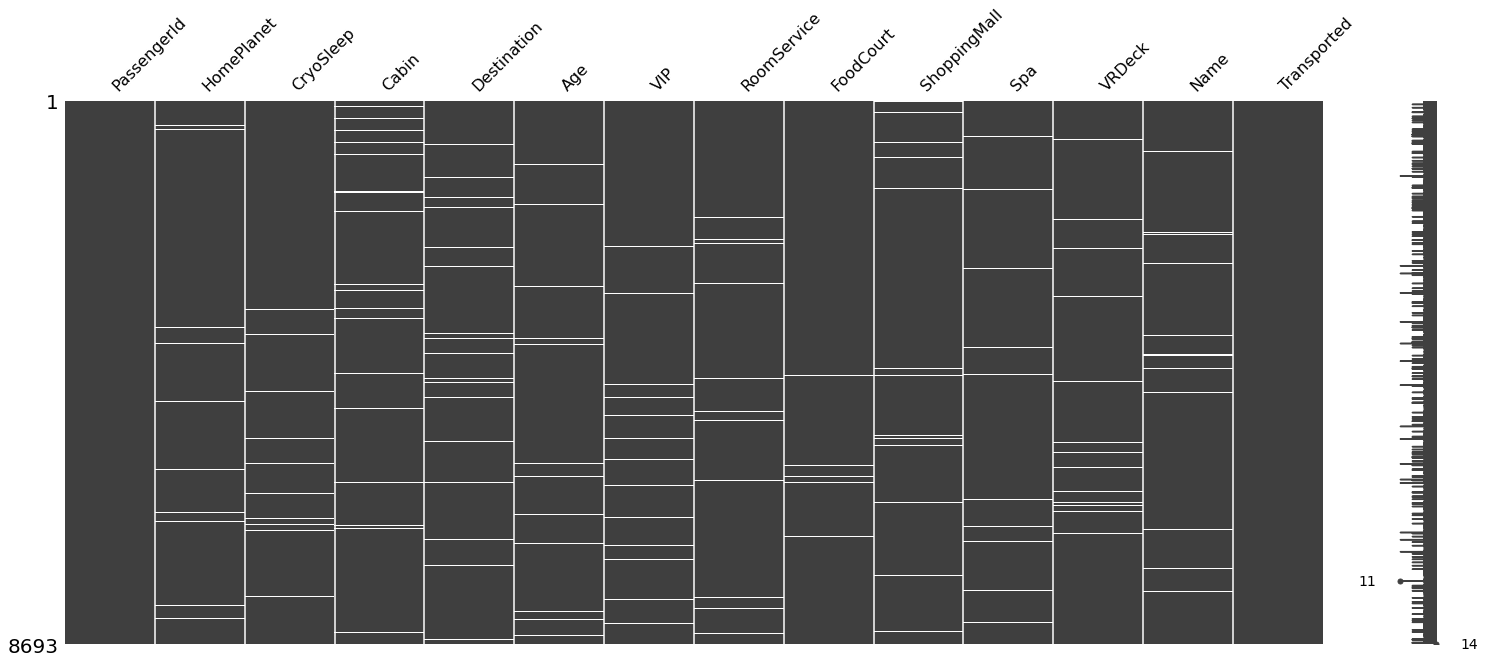

In [9]:
msno.matrix(train_df)
plt.show()

In [10]:
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Now we will look at the distribution of the missing data in the test dataset:

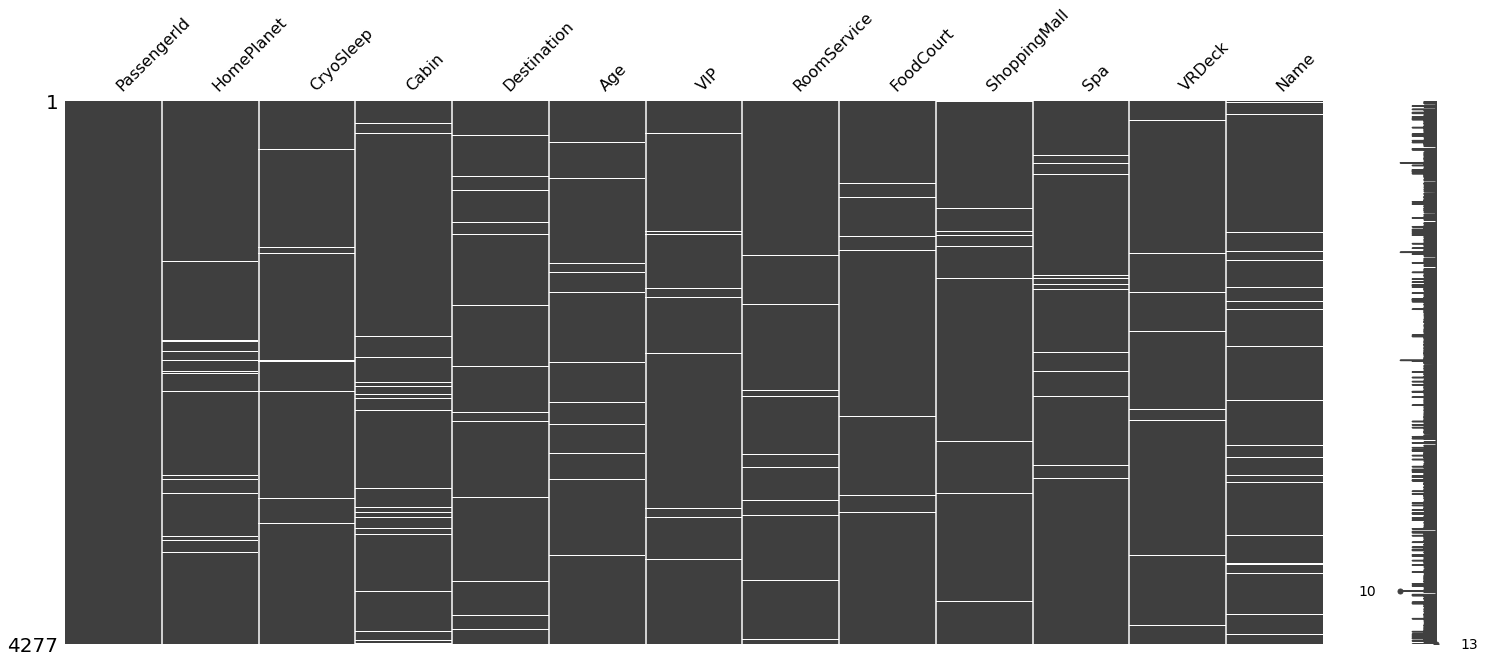

In [11]:
msno.matrix(test_df)
plt.show()

We can see that in the `train` dataset we have missing data in all columns but the `PassengerId` column and the `Transpoted` column. In the `test` dataset, we have missing data in all columns but the `PassengerId` column (we do not have a `Transported` column in the `test` dataset).

The missing data comprises around 2% to 2.5% of the total dataset (per column), which is not a lot, but it is something that needs to be kept in mind and dealt with. There are a number of methods we can employ to deal with missing data. These are:
- Delete any rows that contain missing data
- Impute the values (various methods are available)
- Use algorithms that support missing data
- Try to predict the missing values

We cam plot where the missing data is, again to help understand what we are dealing with.

Since we are interested in the `Transported` people, it makes sense that should look at the numbers:

In [12]:
import plotly.express as px

target_cnt = train_df.groupby(['Transported'])['PassengerId'].count()

fig = px.bar(x=target_cnt.index.astype(str).values,
                y=target_cnt.values,height=600)

# Setting layouts
fig.update_layout(title = dict(text="Target Distribution"),
                  xaxis = dict(title="Transported (True or False)"),
                  yaxis = dict(title='Counts'))

fig.show()

In [13]:
# The exact numbers from the graph above are:
train_df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [14]:
# Another plot type:
# sns.countplot(train_df['Transported'])

Next we can look to see what the `categorical` data columns are, and what the `numerical` data columns are. Categorical variables are types of data that can be divided into groups. Examples are data such as age, race, sex or educational level. Numerical data takes the form of numbers, and are not in any language which could be considered descriptive. 

In [15]:
cat_cols = [col for col in train_df.columns if train_df[col].dtype == 'object' or train_df[col].dtype == 'bool' ]
num_cols = [col for col in train_df.columns if train_df[col].dtype !='object']

print('categorical columns:', cat_cols)
print('numeric columns:', num_cols)

categorical columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported']
numeric columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


One last thing to do before we move on is to transform the `Transported` values to a 1 for `True` and a 0 for `False`. 

I will also transform the reamiming `True` and `False` features into `Yes` and `No`. 

In [16]:
# Function used to make changes
def preprocess_df(dataframe):
    df = dataframe.copy()

    # Drop the name
    df = df.drop(['Name'],axis=1)

    # Transform the Transported column to 0 or 1
    if 'Transported' in df.columns:
        df.loc[df['Transported']==True, 'Transported']=1
        df.loc[df['Transported']==False, 'Transported']=0
        df['Transported'] = df['Transported'].astype('int64')
    
    # Transform the True-False features for CryoSleep and VIP to Yes and No
    df.loc[df['CryoSleep']==True, 'CryoSleep']='Yes'
    df.loc[df['CryoSleep']==False, 'CryoSleep']='No'
    df['CryoSleep'] = df['CryoSleep'].astype('str')

    df.loc[df['VIP']==True, 'VIP']='Yes'
    df.loc[df['VIP']==False, 'VIP']='No'
    df['VIP'] = df['VIP'].astype('str')

    ## Transform the dtypes of HomePlanet and Destination to str
    df['HomePlanet'] = df['HomePlanet'].astype(str)
    df['Destination'] = df['Destination'].astype(str)

    return df

In [17]:
# Calling the function
train = preprocess_df(train_df)

In [19]:
# Print the head to make sure the changes have been made
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,No,B/0/P,TRAPPIST-1e,39.0,No,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,No,F/0/S,TRAPPIST-1e,24.0,No,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,No,A/0/S,TRAPPIST-1e,58.0,Yes,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,No,A/0/S,TRAPPIST-1e,33.0,No,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,No,F/1/S,TRAPPIST-1e,16.0,No,303.0,70.0,151.0,565.0,2.0,1
5,0005_01,Earth,No,F/0/P,PSO J318.5-22,44.0,No,0.0,483.0,0.0,291.0,0.0,1
6,0006_01,Earth,No,F/2/S,TRAPPIST-1e,26.0,No,42.0,1539.0,3.0,0.0,0.0,1
7,0006_02,Earth,Yes,G/0/S,TRAPPIST-1e,28.0,No,0.0,0.0,0.0,0.0,NaN,1
8,0007_01,Earth,No,F/3/S,TRAPPIST-1e,35.0,No,0.0,785.0,17.0,216.0,0.0,1
9,0008_01,Europa,Yes,B/1/P,55 Cancri e,14.0,No,0.0,0.0,0.0,0.0,0.0,1


We can see that all changes have been made. From here forward, we will use the dataframe `train`. 

## Numerical Features

Here I will try to understand the statistical features of the numerical features.

Now we will use the `describe` function to examine the descriptive statistics of the dataset.

In [24]:
train.describe().T.style.bar(subset=['mean'],) \
                            .background_gradient(subset=['std'], cmap='coolwarm') \
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Transported,8693.000000,0.503624,0.500016,0.000000,0.000000,1.000000,1.000000,1.000000


We can also use the `groupby` function with `describe`:

In [28]:
train.groupby('Transported').describe().T

Transported                    0             1
Age          count   4226.000000   4288.000000
             mean      29.922858     27.748834
             std       13.699262     15.151705
             min        0.000000      0.000000
             25%       21.000000     18.000000
             50%       27.000000     26.000000
             75%       38.000000     37.000000
             max       79.000000     78.000000
RoomService  count   4217.000000   4295.000000
             mean     389.266066     63.098021
             std      875.638123    274.812497
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        1.000000      0.000000
             75%      473.000000      0.000000
             max    14327.000000   3992.000000
FoodCourt    count   4231.000000   4279.000000
             mean     382.615930    532.691984
             std     1200.115601   1931.306995
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%      179.000000      0.000000
             max    16856.000000  29813.000000
ShoppingMall count   4221.000000   4264.000000
             mean     167.566217    179.829972
             std      456.528126    722.026714
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%       95.000000      0.000000
             max    10705.000000  23492.000000
Spa          count   4223.000000   4287.000000
             mean     564.382666     61.675531
             std     1551.356047    262.682871
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        4.000000      0.000000
             75%      453.500000      0.000000
             max    22408.000000   4103.000000
VRDeck       count   4225.000000   4280.000000
             mean     543.629822     69.148131
             std     1563.088368    291.658171
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        1.000000      0.000000
             75%      388.000000      0.000000
             max    24133.000000   5063.000000